<a href="https://colab.research.google.com/github/irislqy/kaggle_titanic/blob/master/Homework_1_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Loading the data 

In [0]:
import pandas as pd
from pandas import Series,DataFrame

In [497]:
#@title Default title text
from google.colab import files

uploaded = files.upload()



Saving gender_submission.csv to gender_submission (2).csv
Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


In [498]:
for fn in uploaded.keys():
  print('User uploaded file"{name}"with length {length} bytes'.format(name=fn,length = len(uploaded[fn])))

User uploaded file"gender_submission.csv"with length 3258 bytes
User uploaded file"test.csv"with length 28629 bytes
User uploaded file"train.csv"with length 61194 bytes


In [0]:
import io
train_df = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))


In [0]:
test_df = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))

###Preview of the train data

In [501]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [502]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lefebre, Miss. Mathilde",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


###EDA

Explore the distribution to identify whether there is a skewed class distribution problem before analyzing the data in a machine learning model. 


In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


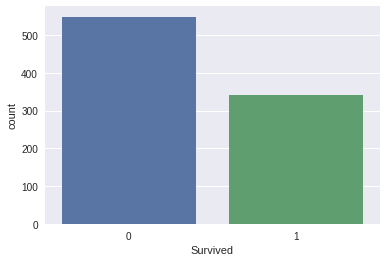

In [148]:
sns.countplot('Survived',data=train_df)


Sex and Pclass are very importance features for survival.

In [503]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [456]:
train_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


This is a cruel fact. Male in class1 and class2 are still have more survival rate than female in class1 and class2. 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


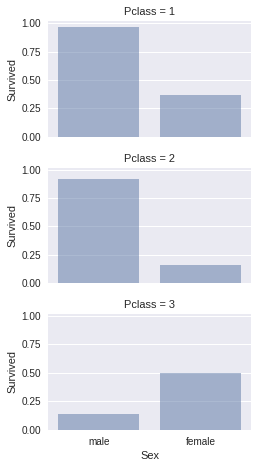

In [206]:
grid = sns.FacetGrid(train_df, row='Pclass', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex','Survived', alpha=.5, ci=None)
grid.add_legend()

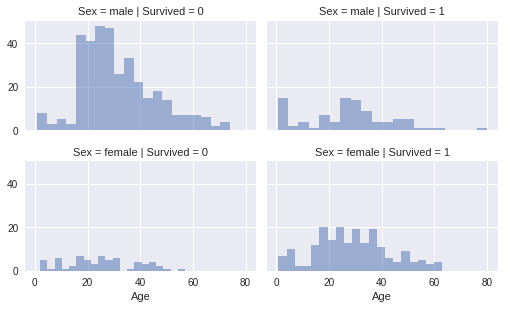

In [457]:
import matplotlib.pyplot as plt
%matplotlib inline
grid = sns.FacetGrid(train_df, col='Survived', row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

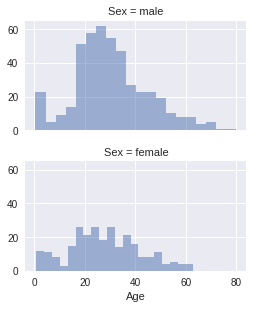

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline
grid = sns.FacetGrid(train_df, row='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Data Cleansing 1: Drop Variables

drop the PassengerID and Cabin column

In [0]:
df = pd.DataFrame(train_df,columns=['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'])





In [0]:
df = df.drop(['Cabin','PassengerId','Ticket'], axis = 1)


In [507]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [508]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
test = pd.DataFrame(test_df,columns=['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'])




In [0]:
test = test.drop(['Cabin','Ticket'], axis = 1)


In [511]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


### Data Cleansing 2 : Imputation
impute the age with the median 
impute the Embarked with the most frequent value

In [0]:
median = df['Age'].mean()
df['Age']= df['Age'].fillna(median)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


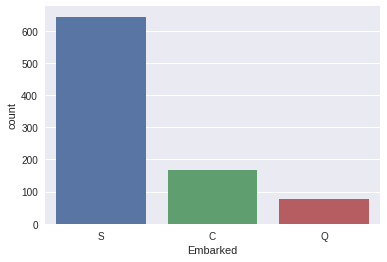

In [470]:
sns.countplot('Embarked',data=train_df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


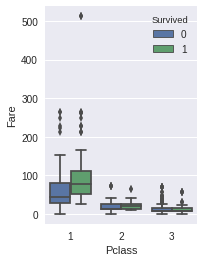

In [240]:
import matplotlib.pyplot as plt
plt.subplot(121)
sns.boxplot('Pclass', 'Fare', 'Survived', df, orient='v')


In [424]:
df.groupby(['Embarked']).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,
C,0.553571,1.886905,30.562419,0.386905,0.363095,59.954144
Q,0.389610,2.909091,29.113724,0.428571,0.168831,13.276030
S,0.336957,2.350932,29.480855,0.571429,0.413043,27.079812


In [0]:
df['Embarked'] = df['Embarked'].fillna('S')

Check whether the imputation is successful. 


In [514]:
df.Age.isnull().any()

False

In [363]:
df.Embarked.isnull().any()

False

In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


In [516]:
median_test = test['Age'].median()
test['Age']= test['Age'].fillna(median_test)
fare = test['Fare'].median()
test['Fare'] = test['Fare'].fillna(fare)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


###Data Cleansing 3: Variable Modification

collect all the title such as Jr, Mirs, or Miss and make it as a new variable
1- honor, 0 - common

In [0]:
total_data = [df,test]

In [0]:
for dataset in total_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [519]:
for dataset in total_data:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Countess','Don','Dona','Dr','Jonkheer','Lady','Major','Master','Rev','Sir'], 'Honor')

    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Miss','Ms','Mme','Mrs','Mr'],'Common')
    
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Common,0.375604
1,Honor,0.492063


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


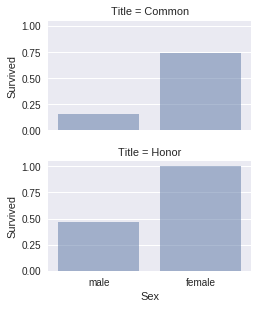

In [364]:
grid = sns.FacetGrid(df, row='Title', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex','Survived', alpha=.5, ci=None)
grid.add_legend()


In [520]:
df.groupby(['Title']).mean()


,Survived,Pclass,Age,SibSp,Parch,Fare
Title,,,,,,
Common,0.375604,2.320048,30.370469,0.442029,0.341787,31.945556
Honor,0.492063,2.158730,20.875644,1.587302,0.904762,35.603638


In [527]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Gender
0,892,3,34.5,0,0,7.8292,Q,0,1
1,893,3,47.0,1,0,7.0000,S,0,0
2,894,2,62.0,0,0,9.6875,Q,0,1
3,895,3,27.0,0,0,8.6625,S,0,1
4,896,3,22.0,1,1,12.2875,S,0,0


Honor - 1 , common - 0

In [0]:
for dataset in total_data:
    dataset['Title'] = dataset['Title'].map( {'Honor': 1, 'Common': 0} ).astype(int)



In [0]:
df = df.drop('Name', axis = 1)
test = test.drop('Name',axis = 1)


changing string variable to numeric variable
Male = 1, female = 0

In [0]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['Gender'] = le.fit_transform(df.Sex)

test['Gender'] = le.fit_transform(test.Sex)


In [0]:
df = df.drop('Sex', axis = 1)
test = test.drop('Sex',axis = 1)

Embarked: "C": 0, "S": 2,"Q": 1

In [0]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['Embarked'] = le.fit_transform(df.Embarked)

test['Embarked'] = le.fit_transform(test.Embarked)

In [529]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Gender
0,0,3,22.0,1,0,7.2500,2,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,2,0,0
3,1,1,35.0,1,0,53.1000,2,0,0
4,0,3,35.0,0,0,8.0500,2,0,1


In [536]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Gender
0,892,3,34.5,0,0,7.8292,1,0,1
1,893,3,47.0,1,0,7.0000,2,0,0
2,894,2,62.0,0,0,9.6875,1,0,1
3,895,3,27.0,0,0,8.6625,2,0,1
4,896,3,22.0,1,1,12.2875,2,0,0


In [0]:
total_data = [df,test]

## Machine Learning: Logistic Regression and Tree Models

###Logistic Regression

In [537]:
X_train = df.drop("Survived", axis=1)
Y_train = df["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [538]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


81.48

In [539]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df

,Features,Coefficient Estimate
0,Pclass,-0.731823
1,Age,-0.022673
2,SibSp,-0.386431
3,Parch,-0.167510
4,Fare,0.005743
5,Embarked,-0.130410
6,Title,1.646707
7,Gender,-2.766434


### Decision Tree and Random Forest
Use Decision Tree and Random Forest to predict the result. 

In [0]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier


In [541]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.43

Measure the feature importance 

In [542]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, Y_train)
print(dict(zip(X_train.columns, clf.feature_importances_)))

{'Pclass': 0.1046479741194193, 'Age': 0.24058906774057917, 'SibSp': 0.04615039512220357, 'Parch': 0.024012818587496158, 'Fare': 0.23758763687991508, 'Embarked': 0.0280077105843334, 'Title': 0.011199669508527637, 'Gender': 0.3078047274575257}


In [543]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred2 = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.43

#### Submission

In [0]:
feature = ['Pclass', 'Age', 'SibSp', 'Parch','Fare','Embarked','Title','Gender']

In [548]:
prediction = clf.predict(test[feature])
prediction

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [0]:

submission_randomforest = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':prediction})

In [554]:
filename = 'Titanic Prediction Beginner.csv'

submission_randomforest.to_csv(filename, index = False)

print('Saved file:' + filename)

Saved file:Titanic Prediction Beginner.csv
